In [ ]:
                                            PCA (Principal Component Analysis)

In [ ]:
PCA (Principal Component Analysis) :-
                                     ek dimensionality reduction technique hai jo data ke high-dimensional space ko lower dimensions mein reduce karta hai, bina zyada information lose kiye. Iska main kaam ye hota hai ki complex data ko simple form mein represent kare, jisse uska analysis aur visualization easy ho jaye.

PCA ka kaam in points:- 
                      Variance Capture: PCA data ke highest variance wale directions ko identify karta hai.
                      Matlab, data ke jo features zyada variability ya information ko represent karte hain, unko pehle prioritize karta hai.

Principal Components:-
                        PCA new features create karta hai, jo old features ka linear combination hote hain. 
                        In new features ko principal components bolte hain, aur yeh ek aise direction mein aligned hote hain jaha data ka variance maximum ho.

Dimensionality Reduction:-
                          Agar aapke dataset mein 100 features hain, lekin aapko lagta hai ki unmein se sirf 10-15 features most important hain,
                        toh PCA 100 features ko compress karke 10-15 principal components banata hai jo zyada information capture karte hain.

Correlation Reduce Karna:-
                          PCA correlated features ko uncorrelated principal components mein transform karta hai.
                            Yeh helpful hota hai kyunki machine learning algorithms ke liye uncorrelated data zyada useful hota hai.

Noise Reduction:-
                Kyunki PCA sirf un features ko prioritize karta hai jisme highest variance hoti hai, 
                            yeh noise ko (jo low variance ke saath features mein hoti hai) remove karne mein help karta hai.

In [ ]:
PCA (Principal Component Analysis) kya hota hai:-
                                                PCA ek dimensionality reduction technique hai, jo high-dimensional data (bahut saare features) ko kam dimensions me convert karti hai without zyada information lose kiye.

Simple words me: PCA data ko compress karta hai, taaki:

data simple ho jaaye

visualization easy ho

machine learning models fast & better kaam karein

PCA ki zarurat kyu padti hai?

Socho tumhare paas:

100 features (columns) hain

bahut saare features aapas me correlated hain

Problems:

Model slow ho jaata hai

Overfitting ka risk badhta hai

Data samajhna mushkil hota hai

PCA in correlated features ko combine karke naye features banata hai, jinko bolte hain Principal Components.

In [ ]:
PCA ka step-by-step process:
Data Standardization: Pehle data ko scale karte hain taki sab features ka mean 0 aur standard deviation 1 ho.

Covariance Matrix Calculation:-
                                Ek matrix banate hain jo data ke har feature ke relationship ko calculate karta hai (matlab unki dependency check karta hai).

Eigenvalues and Eigenvectors:-
                              Covariance matrix se eigenvectors aur eigenvalues calculate karte hain. Eigenvalues humein batati hain ki kis direction mein variance zyada hai, aur eigenvectors un directions ko represent karte hain.

Sort Principal Components:-
                          Eigenvalues ko descending order mein sort karke, unke corresponding eigenvectors ko rakhte hain. Yeh process principal components ko arrange karta hai.

Data Transformation:-
                        Original data ko new coordinate system mein project karte hain jo principal components ke according hota hai.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gaurav\covid_toy.csv")
df.head()
df.fillna(df.mean(numeric_only = True),inplace=True)
cat = df.select_dtypes(include=["object"]).columns
l = LabelEncoder()
for col in cat:
    df[col]= l.fit_transform(df[col])
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [ ]:
Hum sirf numeric features ko select karenge jo PCA ke liye useful hain.
    Non-numeric data (jaise name, gender) ko hatana zaroori hai. ya fir unhe label encode kar do.

In [13]:
s = StandardScaler()
scale = s.fit_transform(df)

In [ ]:
Yahaan humne covid ke 6 numeric columns select kiye hain:
gender : male(0) ya female (1)

_Age: Passenger ka age

_fever: fever ka count

_cough: normal(0) strong(1) count

_city : 0,1,2,3

_hascovid = yes(1) no(0)

_Missing values ko humne column ke mean se fill kiya, aur fir data ko StandardScaler ka use karke scale kiya.

In [45]:
pca = PCA(n_components=2)            #n_components ka maltab hai ki aap apne data ko kitne naye columns(features) mei badlna chahte hai
pca_data = pca.fit_transform(scale)


# Explained variance ko check karte hain
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

Explained variance ratio: [0.21203716 0.20029703]


In [22]:
Yahaan humne n_components=2 set kiya hai, matlab hum 2D space mein data ko visualize karenge.
    explained_varianceratio se pata chalega ki in do components ne kitna variance capture kiya.

SyntaxError: invalid decimal literal (1379050145.py, line 1)

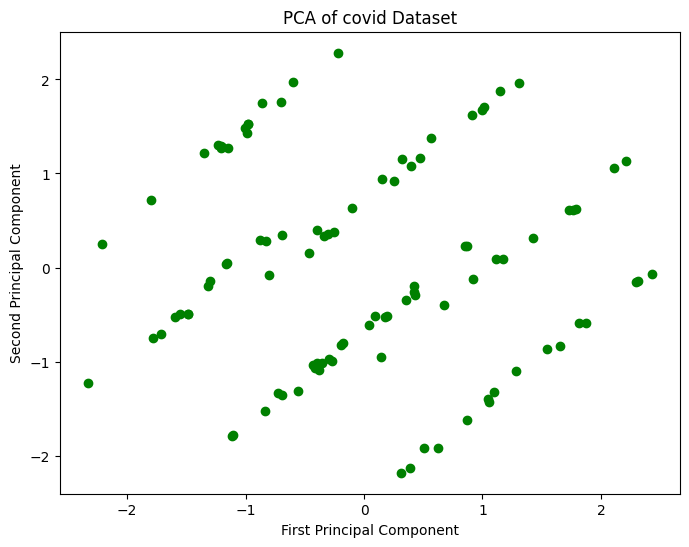

In [46]:
# PCA visualization
# PCA ke results ko plot karte hain
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c='green', marker='o')
plt.title('PCA of covid Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

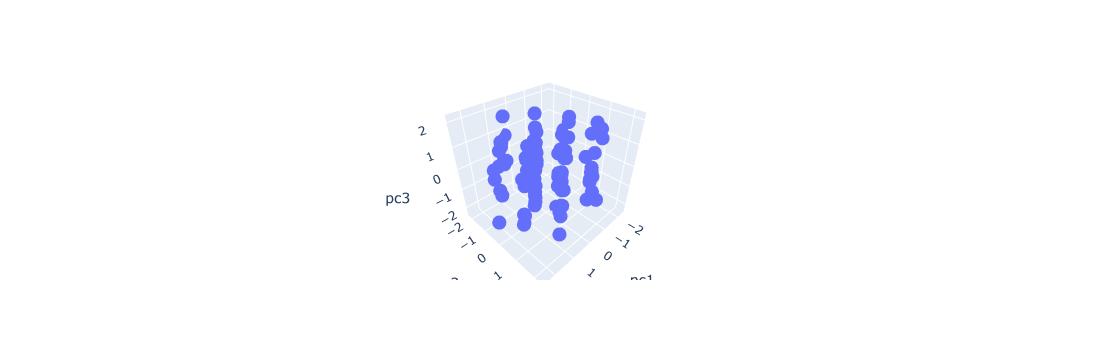

In [44]:
""" its use when n_components is 3 
pca = PCA(n_components=3)            #n_components ka maltab hai ki aap apne data ko kitne naye columns(features) mei badlna chahte hai
pca_data = pca.fit_transform(scale)


# Explained variance ko check karte hain
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')


import plotly.express as px
pca_df = pd.DataFrame(pca_data,columns=["pc1","pc2","pc3"])
fig = px.scatter_3d(pca_df,x="pc1",y="pc2",z="pc3")
fig.show()"""

In [ ]:
Is scatter plot mein:
X-axis: First principal component ko represent karta hai.

Y-axis: Second principal component ko represent karta hai.

Har point ek passenger ko represent karta hai, jisko 2 principal components ke base pe project kiya gaya hai.

In [17]:
# Explained Variance Interpretation
# Variance ka matlab hota hai ki kitna information ya data ka spread har component explain kar raha hai.

print(f'Explained variance by first component: {explained_variance[0]:.2f}')
print(f'Explained variance by second component: {explained_variance[1]:.2f}')


Explained variance by first component: 0.21
Explained variance by second component: 0.20


In [47]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


#loading dataset
iris= load_iris()
X=iris.data
y=iris.target

#perform PCA with 2 components
pca =PCA(n_components=2)
X_pca=pca.fit_transform(X)
#top 2 column lega

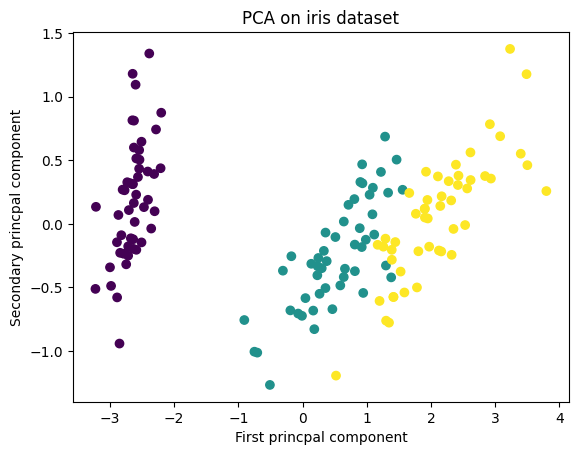

In [48]:
#plot the results
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap= "viridis")
plt.xlabel("First princpal component")
plt.ylabel("Secondary princpal component")
plt.title("PCA on iris dataset")
plt.show()